In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.io import wavfile
from matplotlib import pyplot as plt

In [3]:
music1rate, music1 = sp.io.wavfile.read('./data/music1.wav')
music2rate, music2 = sp.io.wavfile.read('./data/music2.wav')
print(np.size(music1))
print(np.size(music2))
music1 = music1 - np.average(music1)
music2 = music2 - np.average(music2)
z = np.array([music1,music2])
eig = np.linalg.eig(np.cov(z))
D = eig[0]
E = eig[1]
D = np.sqrt(D)
D = 1/D
V = np.dot(np.dot(E,np.diag(D)),np.transpose(E))
newvar = np.dot(V,z)
print(newvar)
print(np.cov(newvar))

885256
885256
[[0.00215283 0.00215283 0.00215283 ... 0.00215283 0.00215283 0.00215283]
 [0.00097598 0.00097598 0.00097598 ... 0.00097598 0.00097598 0.00097598]]
[[1.00000000e+00 3.73394441e-15]
 [3.73394441e-15 1.00000000e+00]]


[0.37613715 0.00043444]


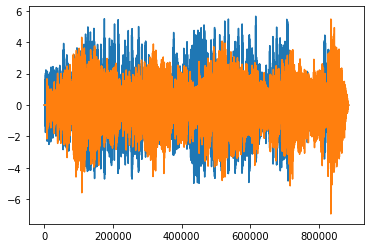

In [6]:
wT = np.array([1,1]) #wの転置を定める
w = wT.T
wT = wT/np.linalg.norm(wT)
b = wT
preW = w
while(1):
  wT = w.T
  tmpw = np.dot(newvar,np.power(np.dot(wT,newvar),3))/np.size(music2)-3*w
  w = tmpw/np.linalg.norm(tmpw)
  if(np.isclose(w,preW).all() or np.isclose(w*(-1),preW).all()):
    break
  else:
    preW = w
plt.plot(np.dot(w,newvar))
sp.io.wavfile.write('./resultdata/music1test.wav',music1rate,np.dot(w,newvar)*0.1)
#-------------------------------#
wT = np.array([0.37613715,0.00043444])
print(wT)
w = wT.T
b = wT
preW = w
while(1):
  wT = w.T
  tmpw = np.dot(newvar,np.power(np.dot(wT,newvar),3))/np.size(music2)-3*w
  w = tmpw/np.linalg.norm(tmpw)
  if(np.isclose(w,preW).all() or np.isclose(w*(-1),preW).all()):
    break
  else:
    preW = w
plt.plot(np.dot(w,newvar))
sp.io.wavfile.write('./resultdata/music2test.wav',music1rate,np.dot(w,newvar)*0.1)